In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [2]:
data=pd.read_csv('glass.csv')
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [3]:
x=data.iloc[:,0:9]
y=data.iloc[:,9]

In [4]:
# Splitting into train & test datas
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=0)

In [5]:
neigh=np.array(range(1,50))
param_grid=dict(n_neighbors=neigh)

In [6]:
# Creating the Model
model=KNeighborsClassifier()
grid=GridSearchCV(estimator=model,param_grid=param_grid)
grid.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [7]:
# Predicting Class
y_pred=grid.predict(x_test)
y_pred

array([7, 1, 2, 6, 5, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 7, 1, 2, 1, 1, 5, 1,
       7, 1, 1, 1, 7, 1, 2, 2, 1, 3, 2, 1, 1, 1, 1, 1, 1, 7, 2, 7, 2],
      dtype=int64)

In [8]:
np.mean(y_pred==y_test)

0.5581395348837209

In [9]:
pd.crosstab(y_test,y_pred)

col_0,1,2,3,5,6,7
Type,,,,,,
1,5,3,1,0,0,0
2,8,11,0,0,0,0
3,5,0,0,0,0,0
5,0,0,0,2,0,0
6,0,0,0,0,1,1
7,1,0,0,0,0,5


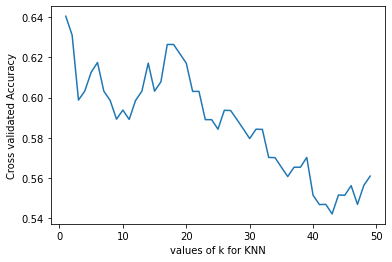

In [10]:
# Plotting the Accuracy
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
k_range=range(1,50)
k_scores=[]

for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    score=cross_val_score(knn,x,y,cv=5)
    k_scores.append(score.mean())
    
plt.plot(k_range,k_scores)
plt.xlabel('values of k for KNN')
plt.ylabel('Cross validated Accuracy')
plt.show()

In [11]:
print(grid.best_score_)
print(grid.best_params_)

0.6956302521008404
{'n_neighbors': 3}
